# Tensorflow 

In [8]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

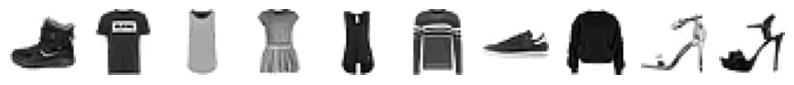

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [9]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

print(np.unique(train_target, return_counts=True))

# 로지스틱 회귀 (with SGD)

In [10]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape) # (60000, 784)

# SGD : 확률적 경사하강법
sc = SGDClassifier(loss='log', max_iter=5, random_state=42) # 로지스틱 회귀, sigmoid activation func, max_iter : 에포크 수

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score'])) # 0.8192833333333333

(60000, 784)
0.8192833333333333


# 인공신경망으로 모델 만들기 with keras

In [11]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape) # (48000, 784) (48000,)
print(val_scaled.shape, val_target.shape)     # (12000, 784) (12000,)

# layer 추가
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 뉴런 개수, 활성화 함수(이진분류는 sigmoid, 다중분류는 softmax), 입력크기
model = keras.Sequential(dense) # 신경망 모델 객체 생성
# 특별한 경우가 아니라면 출력층은 결과 클래스 개수와 동일하다. (따라서 여기서 뉴런 개수는 10)

# 모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# 이진 분류 -> loss="binary_crossentropy"
# 다중 분류 -> loss='(sparse_)categorical_crossentropy'
#   - categorical_crossentropy : 내가 제공한 데이터 타깃값이 원-핫 인코딩이 되어있는 경우
#   - sparse_categorical_crossentropy : 내가 제공한 데이터 타깃값이 원-핫 인코딩이 되어있지 않은 경우, keras가 내부적으로 처리해준다. 
#                                       나중에는 한 샘플에 여러 클래스가 있을 경우에도 사용 가능하다. (중급 과정 정도부터 사용된다.)

# 학습
model.fit(train_scaled, train_target, epochs=5)

# 검증 데이터로 평가
model.evaluate(val_scaled, val_target) # [0.4329913258552551, 0.8554166555404663]

(48000, 784) (48000,)
(12000, 784) (12000,)
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6082 - accuracy: 0.7925
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4754 - accuracy: 0.8383
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4513 - accuracy: 0.8463
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4372 - accuracy: 0.8521
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.4439 - accuracy: 0.8497


[0.4438853859901428, 0.8496666550636292]

# 심층 신경망

In [12]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 레이어 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name="hidden") # 입력 크기는 첫 번째 레이어에만
dense2 = keras.layers.Dense(10, activation='softmax', name="output")

# 모델 생성
model = keras.Sequential([dense1, dense2], name="MNIST_Model")
model.summary()

# ================================= #
# ===== 모델 생성하는 여러 방법 ===== #
# ================================= #

# 방법1 : Sequential initalizer
model2 = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name="hidden2"),
    keras.layers.Dense(10, activation='softmax', name="output2")
], name="MNIST_Model")

# 방법2 : add method
model3 = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name="hidden3"))
model.add(keras.layers.Dense(10, activation='softmax', name="output3"))

# =================================

# 모델 설정
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 학습
model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target) # [0.9826247692108154, 0.5726666450500488]

(60000, 784)
Model: "MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6300 - accuracy: 0.3154
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 1.0967 - accuracy: 0.5030
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9554 - accuracy: 0.5726
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7960 - accuracy: 0.6990
Epoch 5/5
375/375 [===========

[0.6015026569366455, 0.8052499890327454]

# Flatten Layer
배치차원을 제외한 나머지 입력 차원을 모두 일렬로 펼친다.

28*28 -> Flatten Layer -> 784

In [22]:

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # keras에서 제공하는 개발자 편의용 layer. 다른 layer들과는 개념의 결이 다르다
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
# model.fit(train_scaled, train_target, epochs=5)

# model.evaluate(val_scaled, val_target) # [0.3654807507991791, 0.8766666650772095]

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy') # optimizer = 'adam'
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target) # [0.33931195735931396, 0.8773333430290222]

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5288 - accuracy: 0.8158
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3963 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3547 - accuracy: 0.8701
Epoch 4/5
1

[0.3377835154533386, 0.8766666650772095]

# 실습: 타이타닉 생존자 예측하기

In [14]:
import os
os.chdir("../../data")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print(train.info(), test.info(), sep='\n')

# 결측 데이터
train.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

EDA : 데이터 간단한 시각화

C:\Users\qud12\AppData\Local\Temp\ipykernel_22496\980414642.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = train.groupby('Sex').mean()['Survived']


<function matplotlib.pyplot.show(close=None, block=None)>

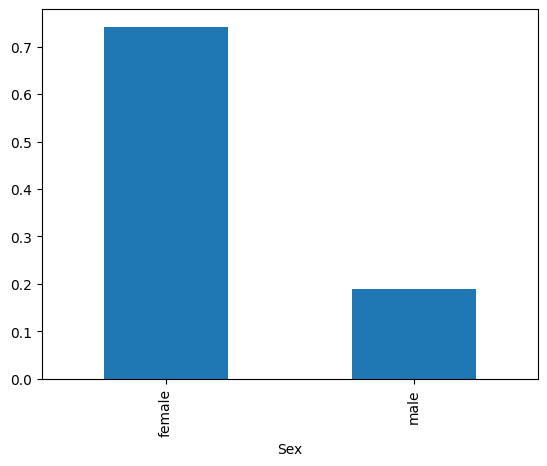

In [15]:
df = train.groupby('Sex').mean()['Survived']
df.plot(kind='bar')
plt.show

C:\Users\qud12\AppData\Local\Temp\ipykernel_22496\96352759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = train.groupby('Pclass').mean()['Survived']


<function matplotlib.pyplot.show(close=None, block=None)>

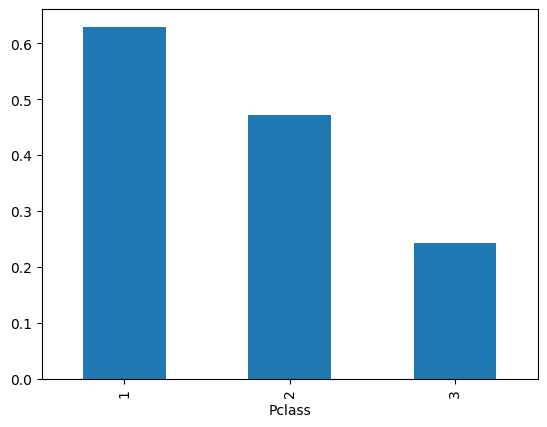

In [16]:
df = train.groupby('Pclass').mean()['Survived']
df.plot(kind='bar')
plt.show

데이터 전처리

In [17]:
# 불필요한 컬럼 제거
columns = ['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name', 'Cabin', 'PassengerId', 'Fare', 'Age']
train.drop(columns, inplace=True, axis=1)
train.dropna(inplace=True) # 결측값 제거

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
dtypes: int64(2), object(1)
memory usage: 21.0+ KB
None


In [18]:
# 학습 데이터 성별을 정수로 치환

for i in train.index:
    if train.loc[i, 'Sex'] == "male":
        train.loc[i, 'Sex'] = 1
    else:
        train.loc[i, 'Sex'] = 0

# train[train['Sex'] == 'male']['Sex'] = 1

print(train.head())

   Survived  Pclass Sex
0         0       3   1
1         1       1   0
2         1       3   0
3         1       1   0
4         0       3   1


타겟 데이터 준비

In [19]:
print(train.Survived) # 생존 정보가 Survived에 저장되어 있으나 2차원 배열임
target = np.ravel(train.Survived) # 1차원 배열로 치환
print(target)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0

학습데이터에서 Survived 정보 삭제

In [20]:
# survived는 target 데이터로 제외했으므로 더이상 훈련세트에 필요가 없다.
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)

print(train.head())

   Pclass  Sex
0     3.0  1.0
1     1.0  0.0
2     3.0  0.0
3     1.0  0.0
4     3.0  1.0


모델 생성과 설정

In [21]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation = 'relu', input_shape = (2,)))
model.add(keras.layers.Dense(8, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model.fit(train, target, epochs=30, verbose=1)

Epoch 1/30
28/28 [==============================] - 1s 1ms/step - loss: 0.7675 - accuracy: 0.3838
Epoch 2/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5410
Epoch 3/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6518 - accuracy: 0.6162
Epoch 4/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6335 - accuracy: 0.6162
Epoch 5/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6162
Epoch 6/30
28/28 [==============================] - 0s 2ms/step - loss: 0.6035 - accuracy: 0.6162
Epoch 7/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.6162
Epoch 8/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5778 - accuracy: 0.6162
Epoch 9/30
28/28 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.6936
Epoch 10/30
28/28 [==============================] - 0s 2ms/step - loss: 0.5512 - accuracy: 0.7688
Epoch 11/30
28/28 [